## Task 2

In [212]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE

### a)

In [140]:
df = pd.read_excel("Data_Cortex_Nuclear.xls").dropna()
df_filt = df[df['class'].isin(['c-SC-s', 't-SC-s', 'c-SC-m', 't-SC-m'])].reset_index(drop=True)
val_counts = df_filt['class'].value_counts()
print(f"It remains {val_counts['c-SC-s']} from class c-SC-s, {val_counts['t-SC-s']} from class t-SC-s, {val_counts['c-SC-m']} from class c-SC-mand {val_counts['t-SC-m']} from class t-SC-m.")

It remains 75 from class c-SC-s, 72 from class t-SC-s, 60 from class c-SC-mand 60 from class t-SC-m.


In [141]:
df_filt.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,3412_1,0.270482,0.447235,0.281872,2.485934,4.341567,0.256210,0.180458,6.651297,0.215589,...,0.140500,0.478291,0.150139,0.192428,0.210056,0.927145,Control,Memantine,S/C,c-SC-m
1,3412_2,0.265892,0.452814,0.298376,2.481098,4.712686,0.249510,0.185942,6.763512,0.221367,...,0.132710,0.441692,0.144338,0.185962,0.202983,0.891220,Control,Memantine,S/C,c-SC-m
2,3412_3,0.274457,0.464007,0.303706,2.524066,4.609399,0.245492,0.182593,6.767571,0.236547,...,0.141888,0.448435,0.142558,0.188934,0.194375,0.872258,Control,Memantine,S/C,c-SC-m
3,3412_4,0.267213,0.424056,0.293354,2.309756,3.925679,0.256279,0.188450,6.288912,0.208440,...,0.155012,0.455494,0.184196,0.213941,0.234145,0.979796,Control,Memantine,S/C,c-SC-m
4,3412_5,0.273375,0.437087,0.304831,2.375739,3.883559,0.257212,0.191519,6.477407,0.215850,...,0.156209,0.482668,0.177929,0.208973,0.235191,0.947345,Control,Memantine,S/C,c-SC-m


### b)

In [142]:
classes = df_filt['class']
df_filt = df_filt.drop(columns=['MouseID', 'Genotype', 'Treatment', 'Behavior', 'class'])
df_filt

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.270482,0.447235,0.281872,2.485934,4.341567,0.256210,0.180458,6.651297,0.215589,1.175518,...,0.214484,0.150747,0.134769,0.132685,0.140500,0.478291,0.150139,0.192428,0.210056,0.927145
1,0.265892,0.452814,0.298376,2.481098,4.712686,0.249510,0.185942,6.763512,0.221367,1.163680,...,0.211746,0.146023,0.128413,0.130772,0.132710,0.441692,0.144338,0.185962,0.202983,0.891220
2,0.274457,0.464007,0.303706,2.524066,4.609399,0.245492,0.182593,6.767571,0.236547,1.192674,...,0.216474,0.146241,0.125230,0.128913,0.141888,0.448435,0.142558,0.188934,0.194375,0.872258
3,0.267213,0.424056,0.293354,2.309756,3.925679,0.256279,0.188450,6.288912,0.208440,1.220400,...,0.215063,0.164440,0.161410,0.139073,0.155012,0.455494,0.184196,0.213941,0.234145,0.979796
4,0.273375,0.437087,0.304831,2.375739,3.883559,0.257212,0.191519,6.477407,0.215850,1.183177,...,0.212264,0.159939,0.145678,0.140412,0.156209,0.482668,0.177929,0.208973,0.235191,0.947345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,0.382149,0.595792,0.399101,2.527574,4.629493,0.317810,0.213235,6.219567,0.232639,1.495507,...,0.245705,0.184612,0.133317,0.132591,0.122308,0.507017,0.172393,0.200097,0.221994,1.141423
263,0.387947,0.586510,0.431650,2.527041,4.781082,0.316903,0.222111,6.307723,0.239074,1.594492,...,0.261893,0.188972,0.153772,0.132869,0.121216,0.492432,0.177319,0.207593,0.235223,1.104757
264,0.343695,0.562547,0.361243,2.412885,3.949361,0.330158,0.225620,6.060165,0.254951,1.625219,...,0.232715,0.189189,0.146135,0.129793,0.121936,0.490258,0.169076,0.182590,0.243715,1.104494
265,0.346594,0.551467,0.390353,2.445052,4.236201,0.343610,0.229239,6.023371,0.240676,1.674043,...,0.231471,0.208497,0.155311,0.120850,0.136900,0.502282,0.180016,0.199685,0.269866,1.136585


In [144]:
pca = PCA(n_components=2)
df_pca_np = pca.fit_transform(df_filt)

<Axes: xlabel='0', ylabel='1'>

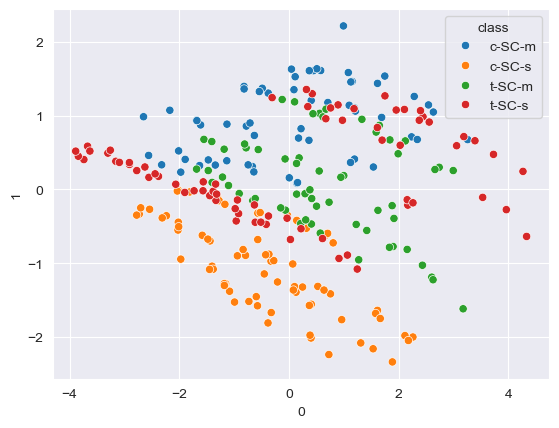

In [146]:
df_pca = pd.DataFrame(df_pca_np)
df_pca['class'] = classes
sns.scatterplot(df_pca, x=0, y=1, hue='class')

1. For the Ts65Dn mice the treatment does not seem to have a clear effect, considering the clusters strongly intersect. For the wildtype controls however there seems to be noticeable effect.
2. They mostly differ but are also quite close sometimes, so there is no clear answer.
3. No they don't become indistinguishable. Also the treatment does not seem to make them more similar to the controls. 

### c)

In [210]:
iso = Isomap(n_neighbors=8)
df_iso_np = iso.fit_transform(df_filt)

We choose n_neighbors=8 since for this value we are able to find at least three distinct clusters while higher or lower values result in structure that are harder to distinguish.

<Axes: xlabel='0', ylabel='1'>

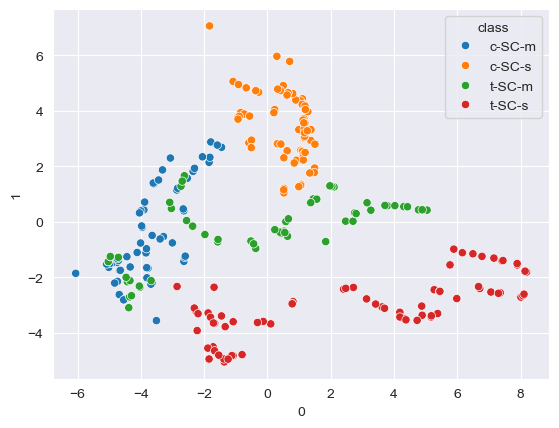

In [211]:
df_iso = pd.DataFrame(df_iso_np)
df_iso['class'] = classes
sns.scatterplot(df_iso, x=0, y=1, hue='class')

1. With this visualization we can argue that the treatment has a clear effect on both the Ts65Dn mice and wildtype controls.
2. ISOMAP gives us indication that the expression profiles of Ts65Dn mice and wildtype controls definitely differ without effective treatment.
3. They still don't become indistinguishable but the treatment seems to make them more similar to the controls. It is however not exactly clear if they are getting more similar to the treated or untreated controls. While one could argue that they are more similar to the treated controls since they sometimes overlap the indications are not strong enough in out opinion.

### d)

In [239]:
tsne = TSNE(perplexity=10.0)
df_tsne_np = tsne.fit_transform(df_filt)

We choose perplexity=10.0 because with this values we again see at least three distinct clusters while higher or lower values result in less clearer separations.

<Axes: xlabel='0', ylabel='1'>

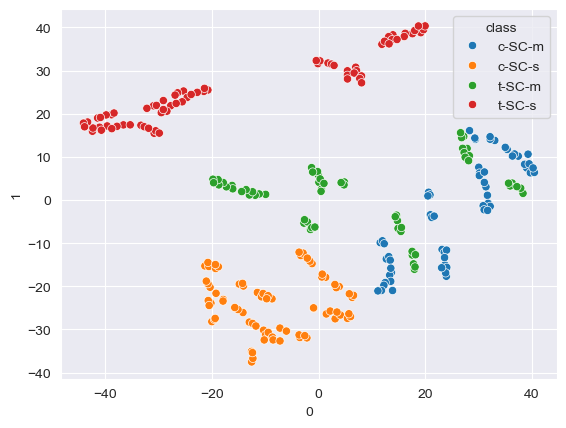

In [240]:
df_tsne = pd.DataFrame(df_tsne_np)
df_tsne['class'] = classes
sns.scatterplot(df_tsne, x=0, y=1, hue='class')

The answers for the three questions actually would not change since we mostly see the same separation in one cluster for the red points, one cluster for the orange points and a region where both blue and green points are present in mini-clusters that intersect.

### e)

In [238]:
lda = LDA(n_components=2)
df_lda_np = lda.fit_transform(df_filt, classes)
df_lda = pd.DataFrame(df_lda_np)
df_lda['class'] = classes

<Axes: xlabel='0', ylabel='1'>

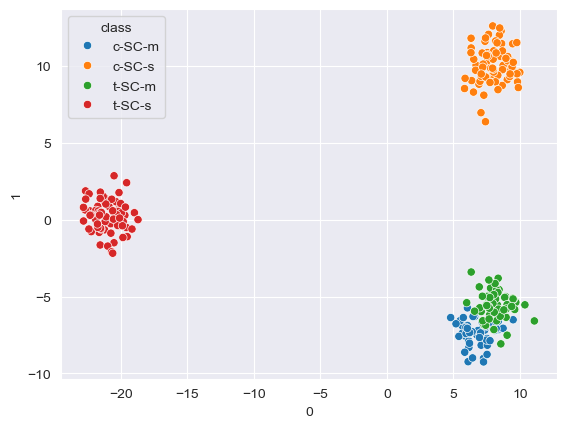

In [241]:
sns.scatterplot(df_lda, x=0, y=1, hue='class')

1. Answer would not change. Treatment has a clear effect.
2. Answer would not change. Still a strong difference.
3. While we think that the expression profiles are still not indistinguishable it is now however very clear that they become more similar to the treated controls and not the untreated ones.

## Task 3

### a)
For $S_W$ to be invertible it needs to be full rank, so rank p. Since all samples are centered around the class mean we lose one degree of freedom in $\sum_{i \in c_j} (y_i - \bar{y}_{c_j}) (y_i - \bar{y}_{c_j})^T$.

This means that in the full sum we lose K degrees of freedom while gaining n, where n is the number of samples. Finally it must hold $n - K > p$ or $n > p + K$ for $S_W$ to be invertible. This also assumes that the set of n centered samples are linearly independent and span the $R^p$.

### b)

In [58]:
df = pd.read_csv("LDA-input.csv")
data = df.drop(columns=['class'])
classes = df['class']
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,class
0,-0.270712,0.104848,0.250528,-0.925200,0.567144,-1.040180,-0.153676,0.789852,-1.226216,-0.948007,C1
1,-0.569654,-0.977150,-0.770632,-0.033711,-1.032859,1.142427,-0.609778,1.469416,1.492679,0.707125,C1
2,-1.858490,-1.370624,-0.330106,-1.515290,1.200060,-1.822619,0.269385,-0.446424,1.114314,-1.380803,C1
3,1.015425,0.224081,-0.644551,0.661532,1.292965,-0.895312,-0.568311,-2.111618,-0.818308,-0.962384,C1
4,5.124502,0.108509,-0.439301,-0.713560,0.934181,0.058656,1.609714,0.859907,-0.985203,-0.958368,C2


In [79]:
classifier = LDA(solver='eigen')
fitted = classifier.fit_transform(data, classes)
fitted = pd.DataFrame(fitted)
fitted['class'] = classes
fitted

,0,1,class
0,-4.537920e+06,0.996773,C1
1,-4.537920e+06,0.145627,C1
2,-4.537920e+06,-1.330110,C1
3,-4.537920e+06,1.738831,C1
4,1.373885e+08,6.511575,C2
5,1.373885e+08,3.914004,C2
6,1.373885e+08,6.339167,C2
7,1.373885e+08,5.698604,C2
8,-3.477653e+07,9.862165,C3
9,-3.477653e+07,8.137266,C3


<Axes: xlabel='0', ylabel='1'>

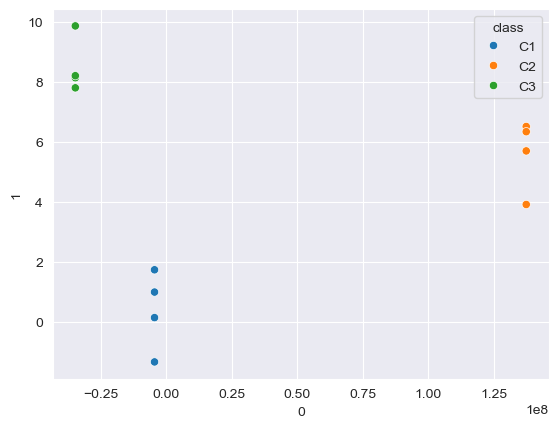

In [53]:
sns.scatterplot(data=fitted, x=0, y=1, hue='class')

### c)

In [55]:
classifier_shrinked = LDA(solver='eigen', shrinkage='auto')
fitted_shrinked = classifier_shrinked.fit_transform(data, classes)
fitted_shrinked = pd.DataFrame(fitted_shrinked)
fitted_shrinked['class'] = classes
fitted_shrinked

,0,1,class
0,0.139280,0.051183,C1
1,-1.040349,-0.532294,C1
2,-0.950807,-1.511792,C1
3,-0.607956,0.917204,C1
4,-1.703061,5.415619,C2
5,-3.041917,4.532940,C2
6,-3.160292,6.047786,C2
7,-1.933719,5.364781,C2
8,5.800231,5.462251,C3
9,3.396302,5.384806,C3


<Axes: xlabel='0', ylabel='1'>

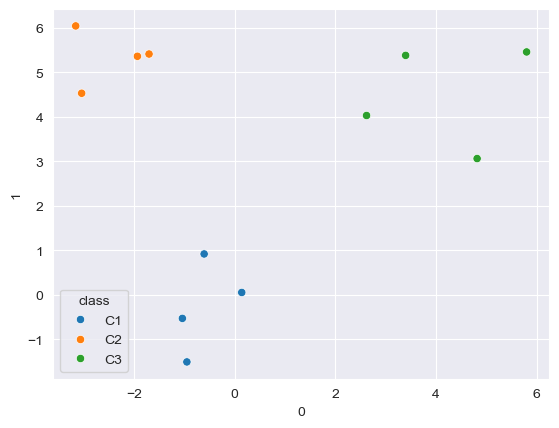

In [56]:
sns.scatterplot(data=fitted_shrinked, x=0, y=1, hue='class')

We prefer the second plot because here the two axes or components have a more similar range. Furthermore the samples with class 1 can actually be distinguished in the first component, contrary to the first plot where every sample is on one line.

### d)

In [72]:
df_c1 = df[df['class'] == 'C1'].drop(columns=['class']).to_numpy()
df_c2 = df[df['class'] == 'C2'].drop(columns=['class']).to_numpy()
df_c3 = df[df['class'] == 'C3'].drop(columns=['class']).to_numpy()
c1_centered = df_c1 - np.mean(df_c1, axis=0)
c2_centered = df_c2 - np.mean(df_c2, axis=0)
c3_centered = df_c3 - np.mean(df_c3, axis=0)
outer_sum_c1 = np.einsum('ni,nj->ij', c1_centered, c1_centered)
outer_sum_c2 = np.einsum('ni,nj->ij', c2_centered, c2_centered)
outer_sum_c3 = np.einsum('ni,nj->ij', c3_centered, c3_centered)

In [77]:
S_W = outer_sum_c1 + outer_sum_c2 + outer_sum_c3
cond = np.linalg.cond(S_W)
cond_shrinked = np.linalg.cond(classifier_shrinked.covariance_)
print(f"Condition number without shrinking: {cond}\nCondition number with shrinking: {cond_shrinked}")

Condition number without shrinking: 6.316308719583843e+16
Condition number with shrinking: 9.71784696579182


We see that the condition number without shrinking is very high indicating a ill-conditioned matrix. This leads to small errors being greatly magnified. In our case this probably explains why there is hardly any difference in one component for the different classes.

## Task 4

### a)

#### According to the authors, is it generally more promising to generate multiple 2D plots with different dimension reduction techniques to obtain a more comprehensive impression of a high-dimensional dataset, or is it better to retain a larger number of dimensions, and visualize them with a SPLOM?

The figure 6 shows that most often a different DR technique shows the same seperability information as the usage of a SPLOM would show. This conclusion comes from seeing many more white boxes (same seperability information) in the subfigure 6(b) then 6(a). But as 6(b) shows many red boxes (substantially less seperability information) we can conclude that a different 2d plot would convey the seperability information better.

#### Which figure shows the data that is relevant to this question?

Figure 6

#### Does it suggest any exceptions from the general rule?

Some realworld datasets like the 'industryIndices' show better result for the SPLOM as the seperability information was contained in the 2nd or 3rd principal components when using PCA. These could not be properly integrated into visualization so the SPLOMs added important information.

### b)

#### The paper includes the quite drastic statement that “interactive 3D rarely helps but often hurts”. State at least two problems of interactive 3D visualizations in this context. 

Interactive 3D scatterplots suffer from problems like:
- depth ambiguity
- perspective distortion of angles and distances
- occlusion of points

#### Explain why, in another application context, interactive 3D visualizations (not necessarily 3D scatterplots) might still be effective. Give an example of such a case

The problem of depth ambiguity is especially bad with scatterplots because cues used for depth perception like shadows or shading cant be used. This can be different in other 3D visualization techniques where there are fewer but larger objects as these could use depth cues to remedy this problem. An example for this could be 3D bar charts, where the different sides of the bars could be shaded based on the angle to the viewport of the user. Additionally shadows could be integrated to show the user more clearly which bars are closer or further away.


![3d bar chart](./sphx_glr_3d_bars_001_2_00x.png "3D bar chart with shading")

source: https://matplotlib.org/stable/gallery/mplot3d/3d_bars.html

### c)
#### Why did the authors decide to perform a time-consuming manual coding of class separation rather than use an objective measure such as the distance consistency or distribution consistency that we learned about in the lecture?

They tested these objective measures against their own human judgment and found stark differences in class separation evaluations for half of their tested plots. As such they chose not to use these automated measures.

#### How did they verify the reliability of their subjective impression of class separation?

They build upon previous empirical evidence that trained experts are consistent in their evaluation of cluster separation and therefore used two coders. Using two coders allowed them to check if their evaluations where consistent using the Krippendorff alpha. Additionally they setup meetings of the two coders where they could compare techniques and adapt them together to get to a consistent workflow.

#### Based on their results, is it possible to state which combination of dimension reduction and visual encoding worked best for each of the datasets?

Not really, they specifically point out that changing from linear to non-linear DR techniques and vice versa can be helpfull for different datasets and that there is no one-and-only DR technique. For VE techniques they advise to disregard interactive 3D plots completly and only look at SPLOMs when the analyst has a strong intuition that the separability is not visible in 2D plots.

### d)

#### PLOMs are flexible with respect to the dimension, as long as it does not become too large. How has a suitable number of dimensions been selected in this work? 

The dimension of the PLOMs was choosen as a value n between 3 and d_max, with an additional cutoff at 15. Where d_max was computed from a combination of the original dimensionality and the values of class separation measures.

#### How large were the resulting SPLOMs on average?

The SPLOMs choosen by the coders had a mean dimensionality of 4.1.